<a href="https://colab.research.google.com/github/Pushkarkv/Advanced-Tensorflow/blob/main/Training_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Model(object):
  def __init__(self):
    self.w= tf.Variable(2.0)
    self.b= tf.Variable(1.0)
  def __call__(self, x):
    return self.w*x+self.b
model=Model()

In [3]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y- target_y))

In [4]:
TRUE_w= 3.0
TRUE_b= 2.0
NUM_EXAMPLES= 1000

xs= tf.random.normal(shape=[NUM_EXAMPLES])
ys= (TRUE_w* xs)+ TRUE_b

In [5]:
def plot_data(inputs, outputs, predicted_outputs):
  real= plt.scatter(inputs, outputs, c="b")
  predicted= plt.scatter(inputs, predicted_outputs, c='r')
  plt.legend((real, predicted),('Real Data', 'Predicted Data'))
  plt.show()

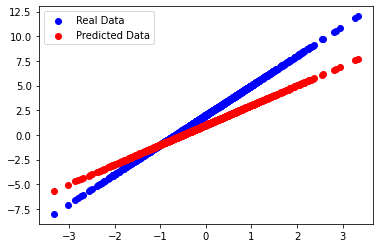

Current loss: 2.158386


In [6]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

In [7]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss= loss(model(inputs), outputs)
  dw, db= t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate* dw)
  model.b.assign_sub(learning_rate* db)
  return current_loss

In [9]:
model= Model()

list_w, list_b= [],[]
epochs=range(15)
losses=[]
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss= train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %(epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=2.15839
Epoch  1: w=2.22 b=1.21, loss=1.32653
Epoch  2: w=2.40 b=1.37, loss=0.81552
Epoch  3: w=2.53 b=1.50, loss=0.50153
Epoch  4: w=2.64 b=1.61, loss=0.30853
Epoch  5: w=2.72 b=1.69, loss=0.18987
Epoch  6: w=2.78 b=1.75, loss=0.11689
Epoch  7: w=2.83 b=1.81, loss=0.07198
Epoch  8: w=2.87 b=1.85, loss=0.04435
Epoch  9: w=2.90 b=1.88, loss=0.02733
Epoch 10: w=2.92 b=1.90, loss=0.01685
Epoch 11: w=2.94 b=1.92, loss=0.01040
Epoch 12: w=2.95 b=1.94, loss=0.00642
Epoch 13: w=2.96 b=1.95, loss=0.00396
Epoch 14: w=2.97 b=1.96, loss=0.00245


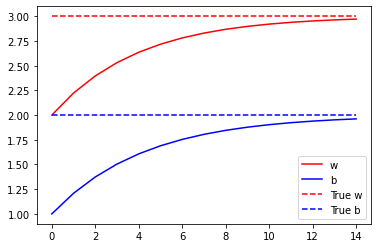

In [10]:
plt.plot(epochs, list_w, 'r',
         epochs, list_b, 'b')
plt.plot([TRUE_w]* len(epochs), 'r--',
         [TRUE_b]* len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

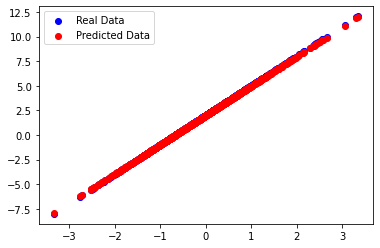

In [11]:
test_inputs= tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs= test_inputs* TRUE_w+ TRUE_b

predicted_test_outputs= model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

In [12]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120+ idx+ 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')

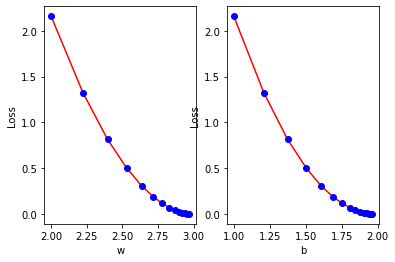

In [13]:
weights_list=[{'name': 'w',
               'values': list_w},
              {'name': 'b',
               'values': list_b}]
plot_loss_for_weights(weights_list, losses)